# GUÍA 4 - CRÍMENES EN CHICAGO 2019 A 2024

## Bibliotecas y carga de datos

- Se procede a cargar las librerías necesarias a usar para la preparación de la data, las visualizaciones, entre otras.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer #para valores faltantes usando knn para datos continuos
from sklearn.preprocessing import StandardScaler, MinMaxScaler #para el escalado mejorado

from sklearn.ensemble import RandomForestClassifier # para emplear modelo de randonforest
from sklearn.feature_selection import SelectFromModel # para seleccion de caracteristicas


df = pd.read_csv('crimenes.csv')
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
1363144,13591313,JH421143,09/09/2024 12:00:00 AM,047XX W NORTH AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.745301,"(41.909636288, -87.745300725)",4.0,22615.0,26.0,62.0,45.0,2.0,6.0,195.0
1363145,13592306,JH421044,09/09/2024 12:00:00 AM,028XX N SHEFFIELD AVE,0460,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,False,...,-87.653879,"(41.933187601, -87.653878576)",38.0,4449.0,57.0,680.0,25.0,22.0,5.0,31.0
1363146,13591463,JH421448,09/09/2024 12:00:00 AM,027XX E 75TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,-87.558258,"(41.758475455, -87.558257551)",43.0,22538.0,39.0,421.0,37.0,24.0,19.0,225.0
1363147,13591986,JH422145,09/09/2024 12:00:00 AM,016XX N KEDZIE AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,-87.706798,"(41.910555052, -87.706797795)",10.0,22535.0,24.0,390.0,49.0,1.0,7.0,171.0
1363148,13591115,JH420999,09/09/2024 12:00:00 AM,058XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,-87.622314,"(41.788654327, -87.622313517)",53.0,22260.0,7.0,403.0,4.0,60.0,24.0,268.0


## Preparación de los Datos

- En primer lugar tenemos que identificar la data y ver como los datos faltantes pueden afectar en nuestro análisis.

- Vamos a ver cuantos son los datos faltantes y ver la cantidad de valores nulos para darnos una idea de con que estamos tratando.

a. Datos faltantes

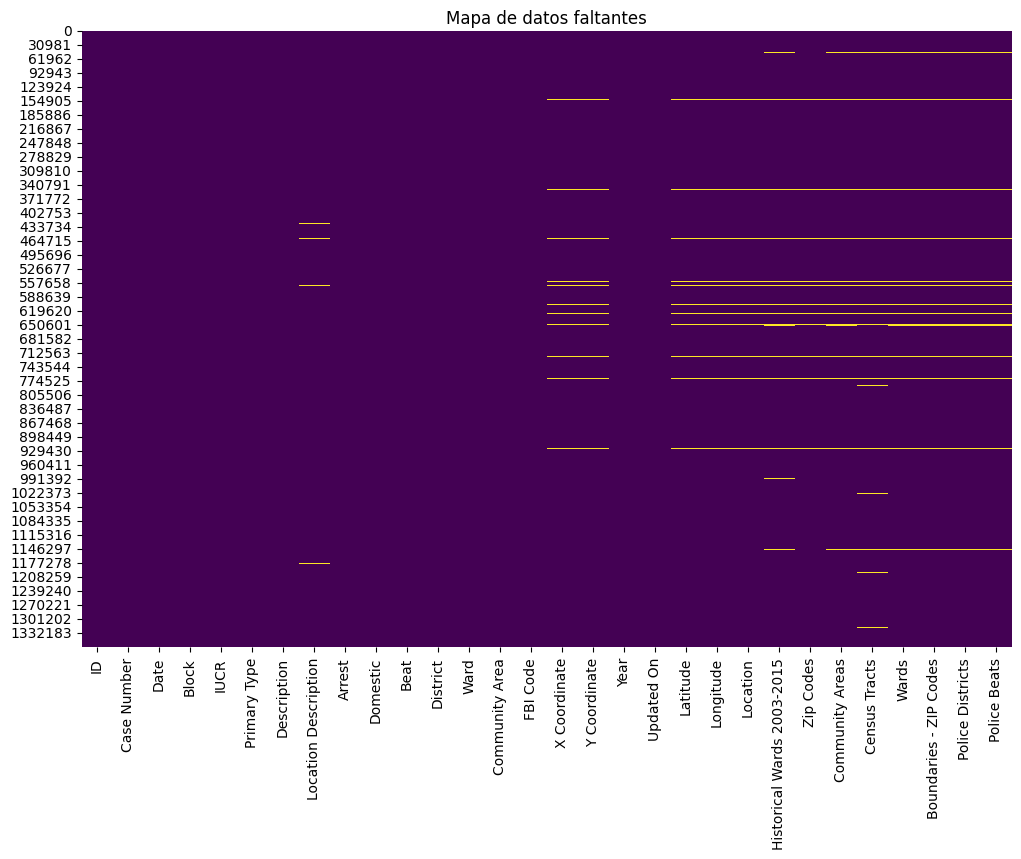

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,7384
Arrest,0
Domestic,0


In [ ]:
# Visualización de datos faltantes usando Seaborn
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de datos faltantes')
plt.show()

#cantidad de valores nulos
df.isnull().sum()

Como se observa, de la totalidad del dataset sobrepasa los 1.3 millones de registros de crimenes y en ningun atributo (columna) se sobrepasa de 25 mil valores faltantes. Siendo una cantidad baja se procede a trabajar con esa data y tratandola con imputaciones de valores faltantes usando media y moda para variables continuas y categóricas.

In [ ]:
# Imputar valores faltantes para variables continuas usando la media
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

# Imputar valores faltantes para variables categóricas con la moda
df['Location Description'].fillna(df['Location Description'].mode()[0], inplace=True)

# Usar KNN para imputar datos continuos (si hay más columnas numéricas con valores faltantes)
knn_imputer = KNNImputer(n_neighbors=5)
df[['Latitude', 'Longitude']] = knn_imputer.fit_transform(df[['Latitude', 'Longitude']])

Eliminar filas con valores faltantes y que no son beneficiosas para el análisis se eliminan del conjunto de datos.

In [ ]:
columns_to_check = ['X Coordinate', 'Y Coordinate', 'Location', 'Historical Wards 2003-2015',
                    'Boundaries - ZIP Codes', 'Zip Codes', 'Census Tracts', 'Wards',
                    'Police Districts', 'Police Beats']

# Eliminar filas que tengan valores nulos en cualquiera de estas columnas
df = df.dropna(subset=columns_to_check)

# Verificar que no queden valores faltantes en esas columnas
print(df.isnull().sum())


ID                             0
Case Number                    0
Date                           0
Block                          0
IUCR                           0
Primary Type                   0
Description                    0
Location Description           0
Arrest                         0
Domestic                       0
Beat                           0
District                       0
Ward                          36
Community Area                 0
FBI Code                       0
X Coordinate                   0
Y Coordinate                   0
Year                           0
Updated On                     0
Latitude                       0
Longitude                      0
Location                       0
Historical Wards 2003-2015     0
Zip Codes                      0
Community Areas                0
Census Tracts                  0
Wards                          0
Boundaries - ZIP Codes         0
Police Districts               0
Police Beats                   0
dtype: int

Imputación con la moda: Las columnas con pocos valores faltantes, como Ward y Community Area, son imputadas con la moda, ya que estas variables suelen tener valores repetidos que representan zonas administrativas.

In [ ]:
# 2. Imputar valores faltantes en columnas con pocos valores faltantes (moda)
df['Ward'].fillna(df['Ward'].mode()[0], inplace=True)
df['Community Areas'].fillna(df['Community Areas'].mode()[0], inplace=True)

Imputación con categoría "Desconocido": Para las columnas categóricas como Location Description, creamos una nueva categoría para manejar los valores faltantes, preservando los datos sin necesidad de eliminarlos.

In [ ]:
# 3. Imputar categóricas faltantes con una nueva categoría 'Desconocido'
df['Location Description'].fillna('Desconocido', inplace=True)

# Verificar que no haya más valores faltantes
print(df.isnull().sum())

ID                            0
Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Boundaries - ZIP Codes        0
Police Districts              0
Police Beats                  0
dtype: int64


b. Codificación mejorada

Se van a cambiar el tipo de variables de Arrest y Domestic de categóricas a numericas para facilizar el uso de la data antes siendo un booleano de true or false y ahora pasando a numerico de 0 si es falso y 1 si es verdadero

In [ ]:
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)

Las variables categóricas que tienen múltiples valores únicos como Location Description, pueden ser codificadas usando One-Hot Encoding. Esto es útil para evitar que el modelo asuma un orden entre las categorías y para incluir estas variables en modelos de machine learning.

In [ ]:
# Codificación One-Hot para las variables categóricas
df = pd.get_dummies(df, columns=['Location Description'], drop_first=True)


Es funcional puesto que One-Hot Encoding crea nuevas columnas binarias para cada categoría única en las variables categóricas, permitiendo que se usen en modelos que no pueden manejar directamente variables categóricas

Codificación x agrupación geográfica

Contamos con Latitud y Longitude, se puede agrupar estas coordenadas en áreas más grandes, como distritos o zonas específicas, para facilitar el análisis geoespacial. Así se puede usar clustering para agrupar los puntos de coordenadas cercanas entre sí, facilitando la visualización y el análisis espacial.

In [ ]:
# Crear cuadrantes de coordenadas geográficas (esto simplifica el análisis geográfico)
df['LatGroup'] = pd.cut(df['Latitude'], bins=5, labels=False)
df['LonGroup'] = pd.cut(df['Longitude'], bins=5, labels=False)


c. Escalado mejorado

- Estandarización avanzada: Además de escalar variables como Latitude y Longitude, también seria interesante escalar todas las variables numéricas relevantes para normalizar las entradas al mismo rango que mejoraría para el uso con modelos predictivos.

- Normalización Min-Max: Si además se trataría de utilizar algoritmos basados en distancia como el K Nearrest Neighbours o clustering, la normalización Min-Max puede ser una mejor opción. (Se considera pero no se ejecuta, queda como comentario)

In [ ]:
# Escalar variables numéricas con estandarización (media 0, desviación estándar 1)
scaler = StandardScaler()
numerical_cols = ['Latitude', 'Longitude', 'Beat', 'District', 'Ward', 'Community Areas']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Si usas Min-Max para ciertos algoritmos (0 a 1):
# minmax_scaler = MinMaxScaler()
# df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])


In [ ]:
#cantidad de valores nulos
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
...,...
Location Description_VESTIBULE,0
Location Description_WAREHOUSE,0
Location Description_YARD,0
LatGroup,0


El escalado de las características geográficas puede mejorar el análisis espacial si fuera necesario. Verificamos si la normalización es requerida para estas variables.

d. Selección de características

Se busco trabajar con el método embebido puesto que abarca los beneficios tanto de los métodos envolventes como de los métodos de filtro, al incluir interacciones entre características pero también al mantener costos computacionales razonables.

- Se podría emplear el método embebido y el modelo de Random Forest para seleccionar automáticamente las variables más relevantes para la predicción, consiste en hacer una poda para quedarse con las características más importantes.

- Por otro lado tambien sería optimo considerar el análisis de varianza (ANOVA) para identificar las variables más significativas en datasets categóricos y numéricos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# ver de que solo queden columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# preparamos las características X y la variable objetivo y
X = df_numeric.drop('Arrest', axis=1)
y = df_numeric['Arrest']

# entrenar el modelo con optimizaciones
rf = RandomForestClassifier(n_estimators=50,  # reducir número de árboles
                            max_depth=10,  # limitar profundidad de los árboles
                            n_jobs=-1,
                            max_features='sqrt',
                            random_state=42)  # reproducibilidad

# entrenar el modelo
rf.fit(X, y)

# sacar características basadas en importancia
model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X)

# mostrar las características más importantes
importances = rf.feature_importances_
feature_names = X.columns
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(important_features.head(10))  # 10 características más importantes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


ID                  0.158403
Longitude           0.093066
Y Coordinate        0.085713
X Coordinate        0.083619
Year                0.078968
Latitude            0.078355
Domestic            0.078153
Beat                0.062953
Police Districts    0.041063
Community Area      0.037410
dtype: float64


e. Ingeniería de características

También seria interesante crear características que podrían ser útiles en la predicción de arrestos.

- Una idea es de agrupaciones temporales, creando una columna que agrupe los crímenes por día de la semana, mes, o incluso estaciones.
- Asi tambien crear variables que representen interacciones entre múltiples características, como la combinación entre el tipo de crimen y el distrito.

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Arrest', 'Domestic', 'Beat',
       ...
       'Location Description_VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
       'Location Description_VEHICLE NON-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',
       'Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS',
       'Location Description_VESTIBULE', 'Location Description_WAREHOUSE',
       'Location Description_YARD', 'LatGroup', 'LonGroup'],
      dtype='object', length=218)

In [ ]:
# Crear nuevas columnas para día, mes y año a partir de la fecha
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

# Crear interacciones entre columnas, por ejemplo entre tipo de crimen y distrito
if 'Primary Type' in df.columns and 'District' in df.columns:
    df['Crime_District_Interaction'] = df['Primary Type'].astype(str) + "_" + df['District'].astype(str)
else:
    print("Error: Columnas 'Primary Type' o 'District' no encontradas")

# Mostrar las primeras filas para verificar
df.head()

<ipython-input-18-1dfd8980e8dd>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS,Location Description_VESTIBULE,Location Description_WAREHOUSE,Location Description_YARD,LatGroup,LonGroup,Month,DayOfWeek,Crime_District_Interaction
3,12312332,JE165297,2019-01-01,009XX W 76TH ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,0,0,-0.747656,...,False,False,False,False,False,2,3,1,Tuesday,CRIMINAL SEXUAL ASSAULT_-0.3182694700166626
35,12595842,JF116915,2019-01-01,026XX N SAYRE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,0,1,1.942946,...,False,False,False,False,False,3,1,1,Tuesday,BATTERY_1.9602093456114256
46,12631707,JF160360,2019-01-01,111XX S AVENUE O,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,0,1,-1.015151,...,False,False,False,False,False,0,4,1,Tuesday,OFFENSE INVOLVING CHILDREN_-1.0302940999004402
50,13187275,JG387404,2019-01-01,030XX W MARQUETTE RD,0263,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,0,0,-0.448858,...,False,False,False,False,False,1,2,1,Tuesday,CRIMINAL SEXUAL ASSAULT_-0.46067439599341814
51,13187280,JG387413,2019-01-01,030XX W MARQUETTE RD,0263,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,0,0,-0.448858,...,False,False,False,False,False,1,2,1,Tuesday,CRIMINAL SEXUAL ASSAULT_-0.46067439599341814


Es útil puesto que esta codificación permite identificar patrones temporales que podrían estar asociados con los crímenes, como si algunos crímenes son más comunes en ciertos días de la semana o durante ciertas horas del día

Generación del csv limpio

In [ ]:
# Guardar el dataset limpio en un archivo CSV
df.to_csv('crimenes_cleaned.csv', index=False)

## Preguntas de investigación y visualizaciones

1. ¿Cómo ha evolucionado la frecuencia de crímenes violentos en comparación con delitos no violentos en diferentes zonas geográficas entre 2019 y 2024?

Se busca clasificar los delitos violentos de los no violentos, examinar su tendencia en distintas áreas de la ciudad en el periodo de 5 años propuesto hasta la actualidad. Considero importante ver zonas mas afectadas puesto que podria haber mejorado la seguridad en ciertas zonas del Estado de Chicago pero pueden haber otras con carencias de seguridad y este resultado identificaría mejor las zonas más violentas por frecuencia de los resultados.

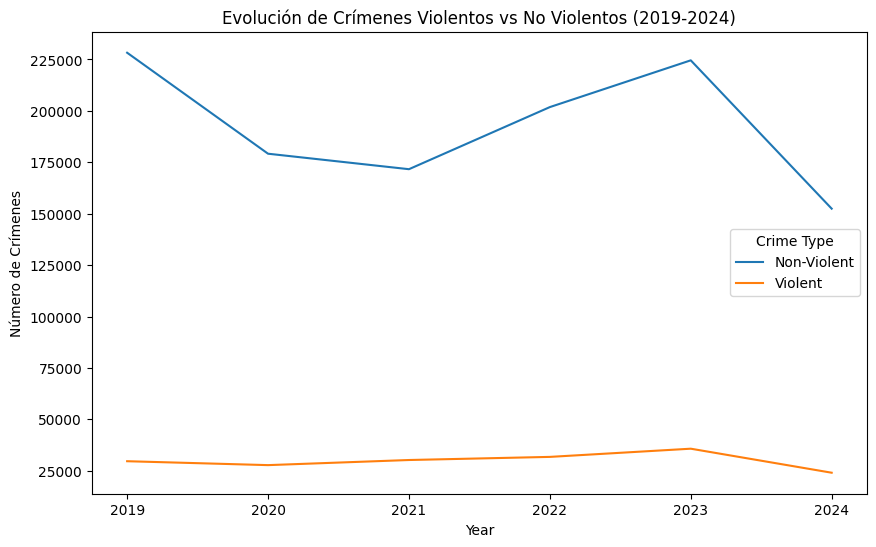

In [ ]:
# Clasificación de delitos violentos y no violentos
violent_crimes = ['CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'HOMICIDE', 'ROBBERY']
df['Crime Type'] = df['Primary Type'].apply(lambda x: 'Violent' if x in violent_crimes else 'Non-Violent')

# Agrupar crímenes violentos y no violentos por año
crime_trends = df.groupby(['Year', 'Crime Type']).size().unstack()

# Visualización
crime_trends.plot(kind='line', figsize=(10, 6))
plt.title('Evolución de Crímenes Violentos vs No Violentos (2019-2024)')
plt.ylabel('Número de Crímenes')
plt.show()


2. ¿Cuál es la relación entre el tipo de crimen y la probabilidad de arresto, considerando factores como el lugar del crimen y si el crimen fue doméstico?

Esta pregunta explora sobre qué tipos de crímenes tienen una mayor o menor probabilidad de resultar en un arresto puede ayudar a identificar las debilidades en la persecución y resolución de ciertos delitos.

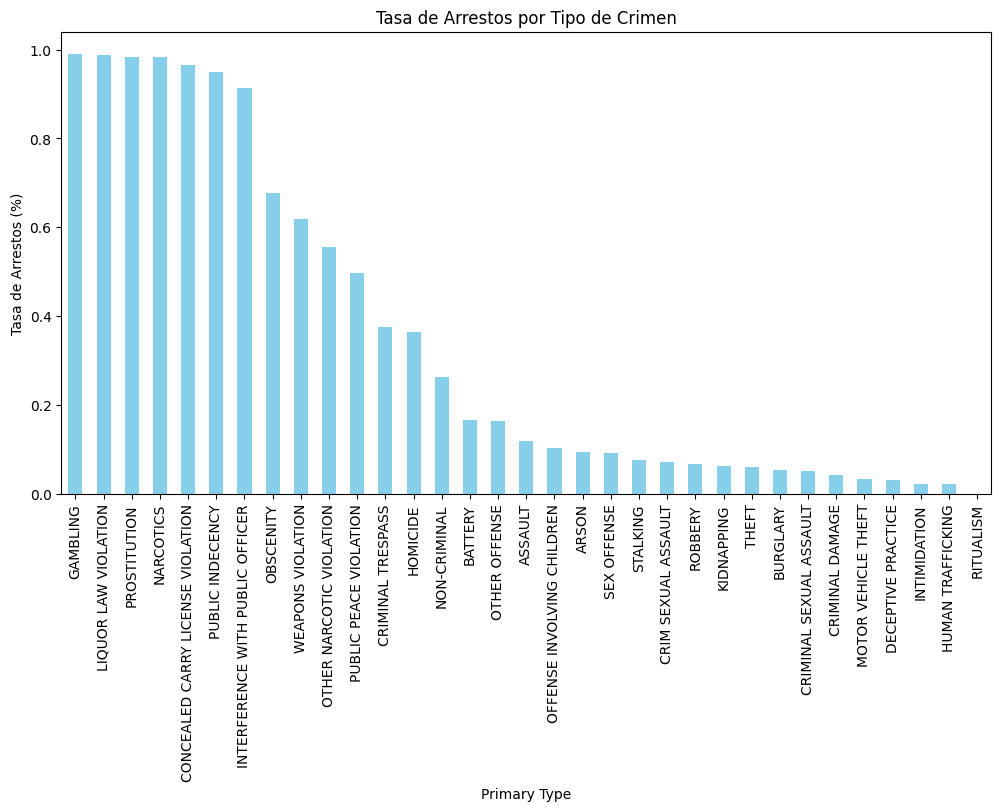

In [ ]:
# Tasa de arrestos por tipo de crimen
arrest_rate = df.groupby('Primary Type')['Arrest'].mean()

# Visualización de la tasa de arrestos por tipo de crimen
plt.figure(figsize=(12, 6))
arrest_rate.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Tasa de Arrestos por Tipo de Crimen')
plt.ylabel('Tasa de Arrestos (%)')
plt.xticks(rotation=90)
plt.show()


3. ¿Cuál es la relación entre el tipo de crimen y la estacionalidad (mes del año)?

Los patrones de crímenes pueden estar influidos por la estacionalidad, con aumentos o disminuciones durante ciertas épocas del año (como el verano o las vacaciones). Comprender este hecho podria ayudar significativamente a las autoridades a planificar mejor los efectivos y recursos policiales para su uso.

Entonces se procede a crear un heatmap donde se mostraría cómo varía la frecuencia de los diferentes tipos de crímenes en cada mes del año, lo que puede ser útil para identificar tendencias estacionales.

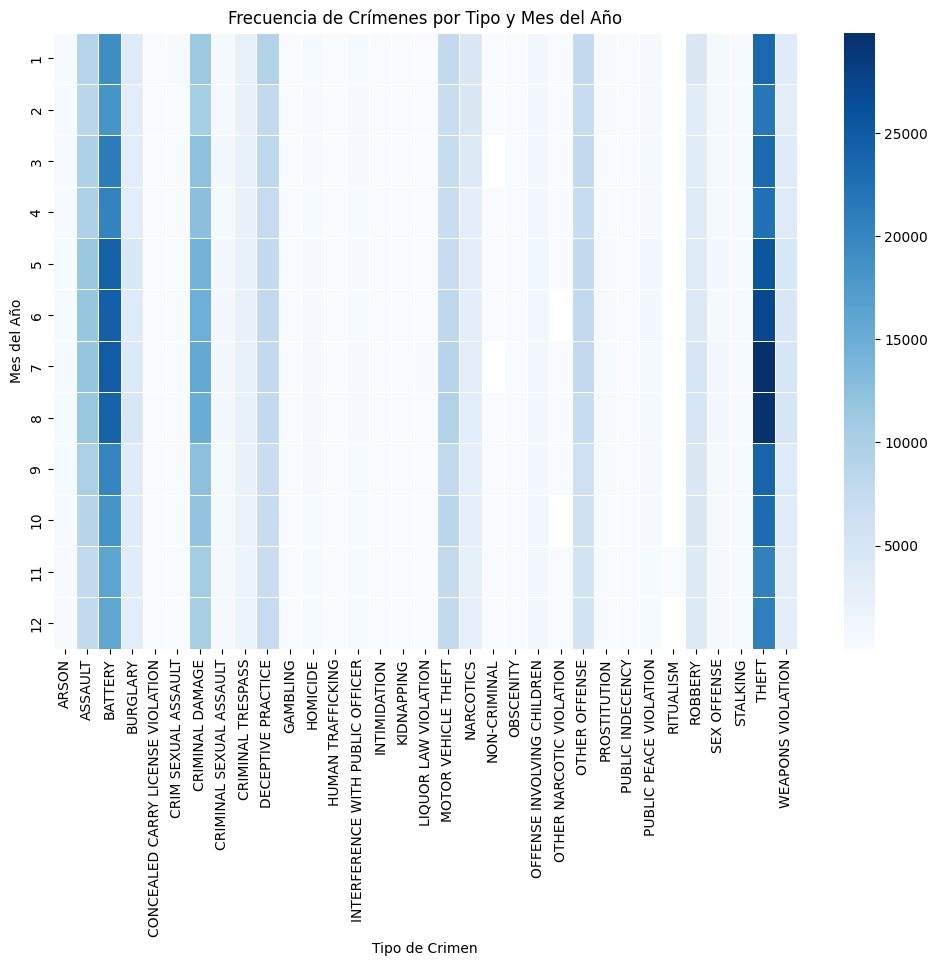

In [ ]:
# Agrupar crímenes por mes y tipo de crimen
crime_by_month = df.groupby(['Month', 'Primary Type']).size().unstack()

# Visualización de un heatmap para la estacionalidad de los crímenes
plt.figure(figsize=(12, 8))
sns.heatmap(crime_by_month, cmap='Blues', annot=False, linewidths=.5)
plt.title('Frecuencia de Crímenes por Tipo y Mes del Año')
plt.xlabel('Tipo de Crimen')
plt.ylabel('Mes del Año')
plt.show()


4. ¿Cuáles son las zonas geográficas con mayor prevalencia de crímenes violentos vs. no violentos?

La pregunta busca identificar las áreas más propensas a crímenes violentos o no violentos puede ayudar a los responsables de la seguridad a dirigir mejor los recursos y mejorar la vigilancia en esas zonas.

En la visualización se mostraría qué áreas geográficas de la ciudad tienden a experimentar más crímenes violentos o no violentos, ayudando a identificar patrones geográficos de actividad criminal.

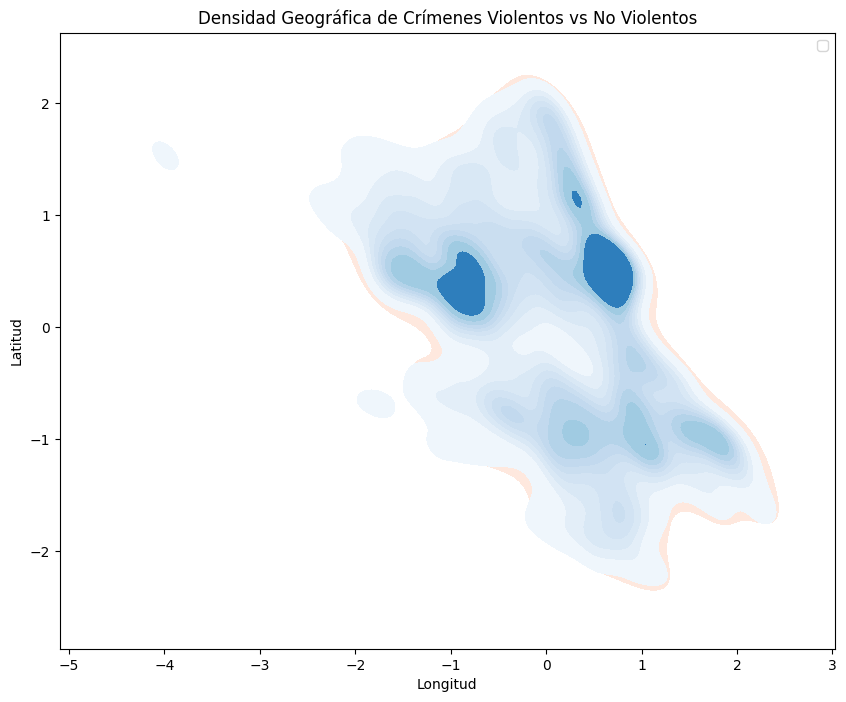

In [ ]:
# Tomar una muestra representativa del 10% de los datos
df_sample = df.sample(frac=0.1, random_state=42)

# Continuar con la clasificación y visualización
df_sample['crime_type'] = df_sample['Primary Type'].apply(lambda x: 'Violent' if x in violent_crimes else 'Non-Violent')

# Visualización del mapa de densidad para crímenes violentos y no violentos
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_sample[df_sample['crime_type'] == 'Violent']['Longitude'],
            y=df_sample[df_sample['crime_type'] == 'Violent']['Latitude'],
            cmap='Reds', fill=True, label='Crímenes Violentos')

sns.kdeplot(x=df_sample[df_sample['crime_type'] == 'Non-Violent']['Longitude'],
            y=df_sample[df_sample['crime_type'] == 'Non-Violent']['Latitude'],
            cmap='Blues', fill=True, label='Crímenes No Violentos')

plt.title('Densidad Geográfica de Crímenes Violentos vs No Violentos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

5. ¿Cuáles son las áreas con más crímenes recurrentes en ciertos días de la semana?

Bueno en esta pregunta se busca determinar si hay ciertos días con una mayor recurrencia de crímenes en áreas específicas similar a la pregunta 3 pero ahora por zonas para mejorar las estrategias de patrullaje.

La visualizacion sería mediante un gráfico de barras agrupado que muestre la frecuencia de crímenes en diferentes días de la semana por áreas comunitarias.

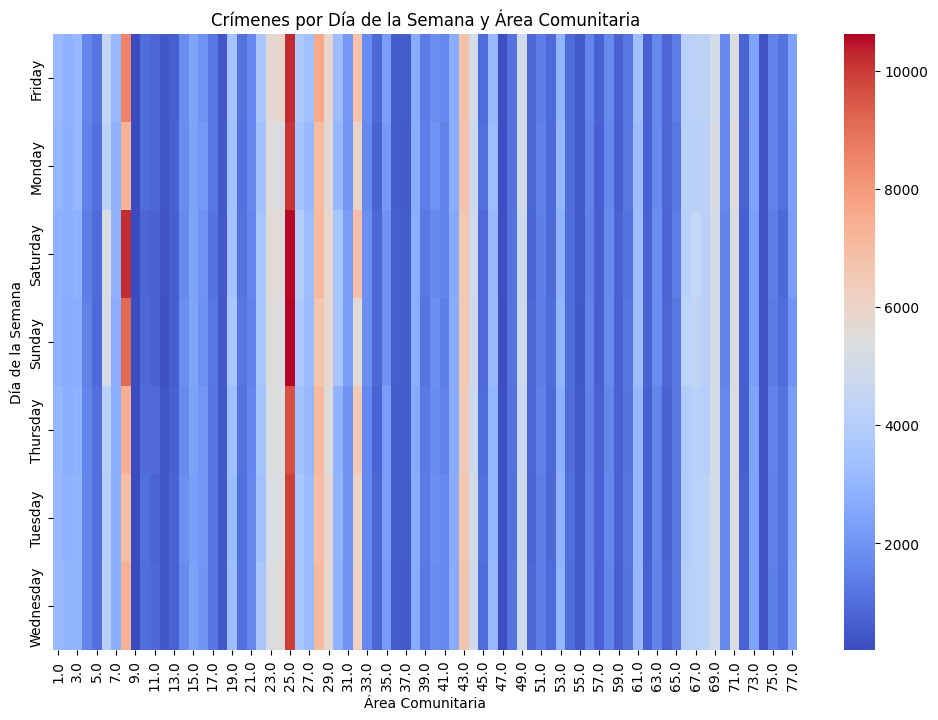

In [25]:
# Agrupar crímenes por día de la semana y área comunitaria
crime_by_day_area = df.groupby(['DayOfWeek', 'Community Area']).size().unstack()

# Visualización del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_by_day_area, cmap='coolwarm', annot=False)
plt.title('Crímenes por Día de la Semana y Área Comunitaria')
plt.xlabel('Área Comunitaria')
plt.ylabel('Día de la Semana')
plt.show()


INSIGHTS - ANÁLISIS DE RESULTADOS

1. Evolución de Crímenes Violentos vs No Violentos (2019-2024):

- Los crímenes no violentos muestran una tendencia de aumento hasta 2023, seguido de una caída en 2024, mientras que los crímenes violentos se mantienen relativamente estables, con ligeras variaciones anuales. Esto sugiere que las políticas públicas podrían haber tenido un impacto más fuerte en la disminución de crímenes no violentos recientemente.

2. Tasa de Arrestos por Tipo de Crimen:

- Los crímenes como el juego ilegal, violaciones a la ley de licencias de armas y prostitución tienen las tasas de arresto más altas (cercanas al 100%), mientras que crímenes como el robo y el asalto sexual tienen tasas mucho más bajas, lo que indica que ciertos tipos de delitos son más fáciles de detectar o resultan en arrestos más efectivos.

3. Frecuencia de Crímenes por Tipo y Mes del Año:

- Se observa una mayor concentración de crímenes como robo y violaciones de armas en los meses de invierno (diciembre y enero). Este patrón estacional podría estar relacionado con factores socioeconómicos y condiciones climáticas que afectan el comportamiento criminal.

4. Zonas geográficas con prevalencia de crimenes violentos vs. no violentos

- Densidad Geográfica de Crímenes Violentos vs No Violentos: En el gráfico, las áreas con alta densidad de crímenes están bien identificadas, pero la diferencia entre crímenes violentos y no violentos no es muy clara debido a la falta de diferenciación de colores o categorías. Sería útil añadir capas más distintivas para cada tipo de crimen para mejorar la visualización y ayudar a identificar las zonas de riesgo con mayor precisión.

- Concentración Geográfica: A pesar de la representación de la densidad general de crímenes, las zonas de mayor concentración de crímenes violentos están bien localizadas, lo que podría ser útil para destinar recursos policiales y mejorar la vigilancia en estas áreas específicas.

5. Áreas con crimenes más frecuentes por dia de la semana

- Crímenes por Día de la Semana y Área Comunitaria (Heatmap): El gráfico de calor muestra claramente que hay áreas comunitarias (como las áreas 7.0, 25.0, y 22.0) que tienen más actividad criminal en ciertos días, como el viernes y martes. Esto sugiere un patrón recurrente en esos días, lo que podría servir para implementar medidas específicas en estas zonas durante esos días.

- Diferencias entre Áreas: No todas las áreas comunitarias muestran la misma concentración de crímenes a lo largo de la semana, lo que indica que algunos vecindarios son más propensos a delitos en días específicos. Esto puede ayudar a priorizar recursos en días y áreas clave.

## Conclusiones generales

1. Evolución de Crímenes Violentos vs No Violentos (2019-2024):

Los crímenes no violentos han aumentado hasta 2023 y han caído en 2024, lo que podría reflejar el impacto de políticas de seguridad pública.
Los crímenes violentos permanecen estables, lo que sugiere que las medidas para prevenir este tipo de delitos aún no han tenido un efecto significativo.

2. Tasa de Arrestos por Tipo de Crimen:

Los crímenes como el juego ilegal y la violación de la ley de armas tienen una alta tasa de arresto, lo que refleja una mejor efectividad en la aplicación de la ley en estos casos.
Sin embargo, delitos graves como el asalto sexual y el robo presentan una baja tasa de arresto, lo que podría indicar dificultades en la persecución de estos crímenes.

3. Frecuencia de Crímenes por Tipo y Mes del Año:

Los crímenes como el robo y las violaciones de armas tienden a aumentar durante los meses de invierno, lo que indica la influencia de factores estacionales en la actividad delictiva.

4. Zonas Geográficas con Mayor Prevalencia de Crímenes Violentos vs No Violentos:

Las áreas de mayor concentración de crímenes son claras, pero la diferenciación entre crímenes violentos y no violentos necesita mejor visualización para poder actuar de manera más efectiva.

5. Crímenes por Día de la Semana y Área Comunitaria:

Las áreas comunitarias específicas tienen una mayor actividad criminal en ciertos días de la semana, lo que sugiere que podrían beneficiarse de un aumento en las patrullas o vigilancia durante esos días.


En general, los análisis y visualizaciones muestran patrones claros en términos de tipos de crímenes, sus tendencias temporales y su concentración geográfica. Estos hallazgos demuestran importancia para comunicar a efectivos encargados de la seguridad pública en el Estado de Chicago, para optimizar la asignación de recursos y mejorar la efectividad de las intervenciones en las áreas y momentos críticos.